In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [ ]:
#loading the data from CSV file to pandas data frame
data=pd.read_csv("/content/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#to view first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
data.shape

(1338, 7)

In [ ]:
#some information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


catagorical features
1.sex
2.region
3.smoker

In [ ]:
#checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#statistical measures of the data
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


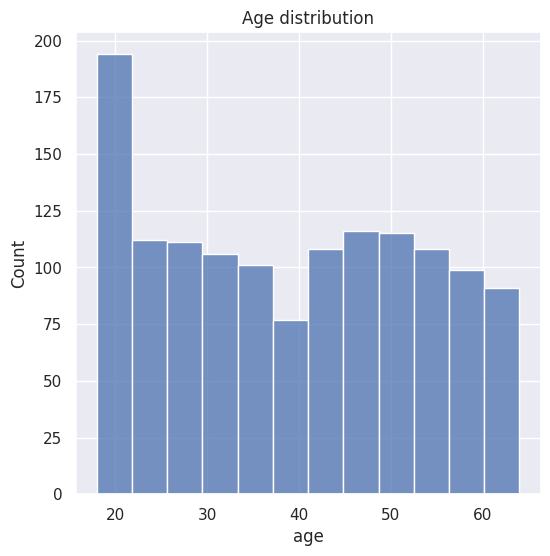

In [ ]:
#distribution of age values
sns.set()     #themed plots
plt.figure(figsize=(6,6))
sns.histplot(data['age'])
plt.title("Age distribution")
plt.show()

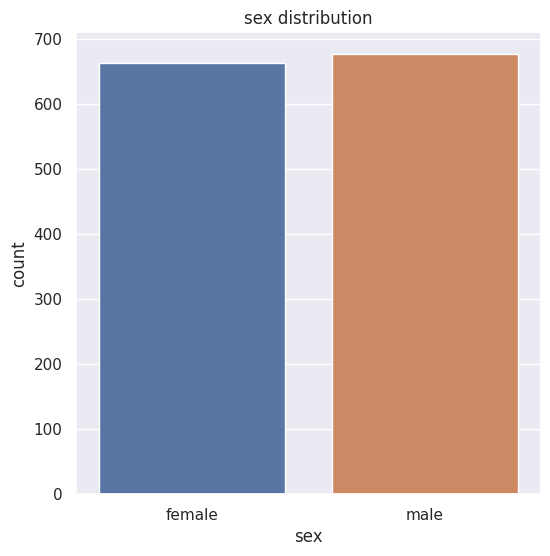

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title("sex distribution")
plt.show()

In [ ]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

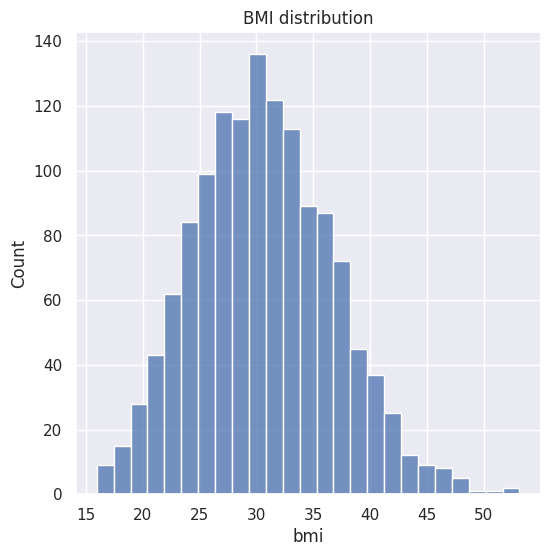

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data['bmi'])
plt.title("BMI distribution")
plt.show()

Normal BMI Range --> 18.5 to 24.9

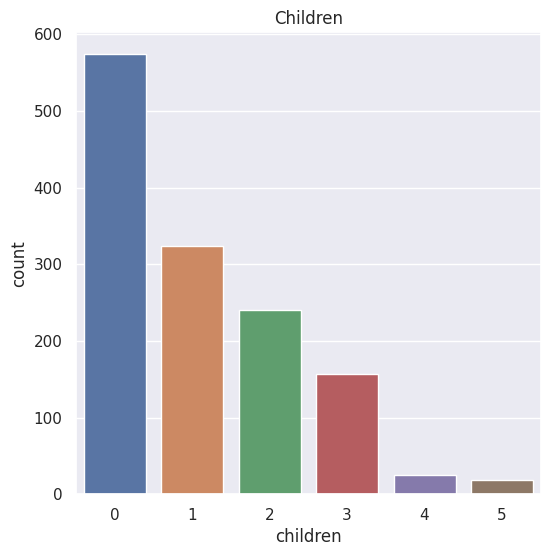

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title("Children")
plt.show()

In [ ]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

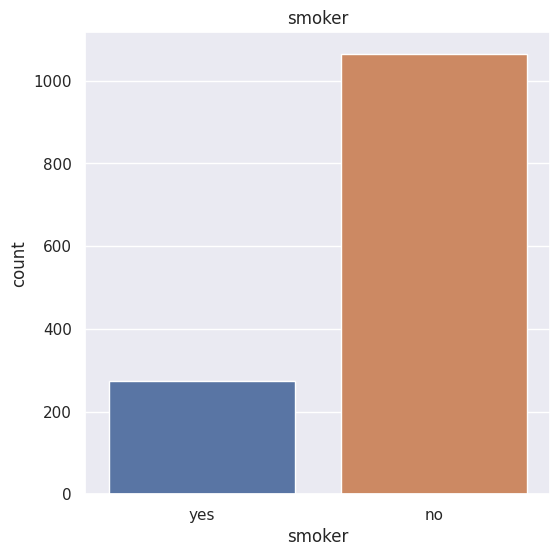

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title("smoker")
plt.show()

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

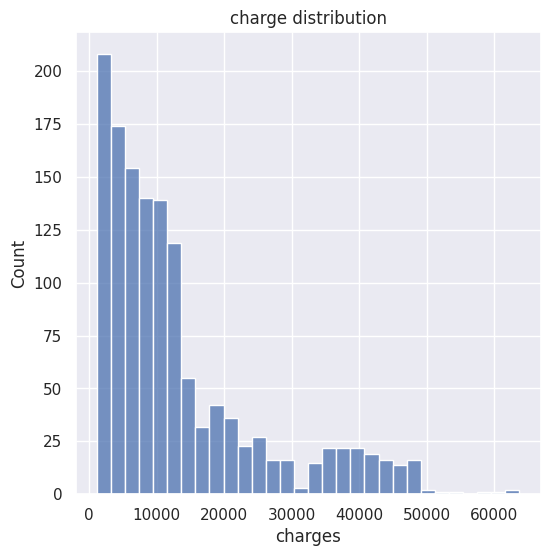

In [ ]:
#distribution of charges values
sns.set()     #themed plots
plt.figure(figsize=(6,6))
sns.histplot(data['charges'])
plt.title("charge distribution")
plt.show()

Data Pre-Processing

Encoding the categorical features

In [ ]:
# encoding sex column
data.replace({'sex':{'male':0, 'female':1}},inplace=True)

#encoding smoker column
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

Splitting features and target

In [ ]:
X=data.drop(columns='charges',axis=1)
Y=data['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training & Testing Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [ ]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
svm=SVR()
svm.fit(X_train,Y_train)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
gr=GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

Model Evaluation

In [ ]:
#prediction on training data
y_pred1=lm.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

df1=pd.DataFrame({"Actual":Y_test,"Lr":y_pred1,"svm":y_pred2,"rf":y_pred3,"gr":y_pred4})

In [ ]:
df1

,Actual,Lr,svm,rf,gr
17,2395.17155,1520.592422,9195.367327,5191.455317,3997.205442
1091,11286.53870,11570.592018,9380.383114,11934.641083,12159.050017
273,9617.66245,10082.438499,9349.482569,16154.501734,11134.165033
270,1719.43630,2246.217543,9182.203618,2044.971406,3009.267748
874,8891.13950,7881.283620,9307.373685,9630.702104,10056.388319
...,...,...,...,...,...
232,1727.78500,-1669.890650,9190.275192,2002.418909,6619.419081
323,11566.30055,15722.419522,9391.639091,16000.615713,13566.571354
1337,29141.36030,36968.055645,9408.339335,28981.648092,28319.448971
1066,8978.18510,12987.364848,9341.251773,10117.902437,10065.341206


Compare Performance visually

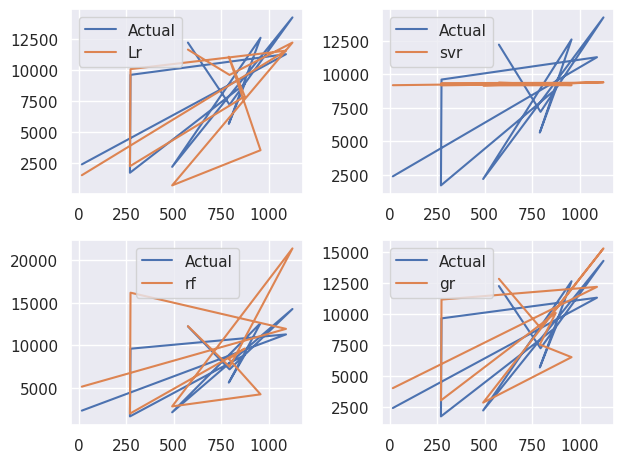

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()
plt.legend()

In [ ]:
s1=metrics.r2_score(Y_test,y_pred1)
s2=metrics.r2_score(Y_test,y_pred2)
s3=metrics.r2_score(Y_test,y_pred3)
s4=metrics.r2_score(Y_test,y_pred4)

In [ ]:
print(s1,s2,s3,s4)

0.7447273869684076 -0.08038132828590361 0.8362975038030918 0.8683951502190685


In [ ]:
m1=metrics.mean_absolute_error(Y_test,y_pred1)
m2=metrics.mean_absolute_error(Y_test,y_pred2)
m3=metrics.mean_absolute_error(Y_test,y_pred3)
m4=metrics.mean_absolute_error(Y_test,y_pred4)

In [ ]:
print(m1,m2,m3,m4)

4267.213826730733 8467.075338758827 2726.304541511754 2374.9715028469027


In [ ]:
data = {'age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [ ]:
new_pred = gr.predict(df)
print(new_pred)

[11867.22355654]


Save Model Using Joblib

In [ ]:
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [ ]:
import joblib

In [ ]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [ ]:
model = joblib.load('model_joblib_gr')

In [ ]:
model.predict(df)

array([10565.7790616])

In [ ]:
from tkinter import *

In [ ]:
def show_entry():

  p1=float(e1.get())
  p2=float(e2.get())
  p3=float(e3.get())
  p4=float(e4.get())
  p5=float(e5.get())
  p6=float(e6.get())

  model = joblib.load('model_joblib_gr')
  result=model.predict([[p1,p2,p3,p4,p5,p6]])

  Label(master,text= "Insurance Cost").grid(row=7)
  Label(master,text=result).grid(row=8)




master =Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text="Insurance Cost Prediction",bg="black",fg="white").grid(row=0,columnspan=2)

Label(master,text= "Enter Your Age").grid(row=1)
Label(master,text= "Male or Female [1/0]").grid(row=2)
Label(master,text= "Enter Your BMI Value").grid(row=3)
Label(master,text= "Enter Number of Children").grid(row=4)
Label(master,text= "Smoker Yes/No").grid(row=5)
Label(master,text= "Region [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text="Predict",command=show_entry).grid()
mainloop()

TclError: ignored